In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,confusion_matrix,fowlkes_mallows_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


Feature ranking:
1. feature Ccolor=purple (0.056385)
2. feature Cpersonality=hunter-ostentatious (0.054760)
3. feature Cinterest=variety (0.050677)
4. feature 'Ctransport=on foot' (0.044548)
5. feature Cbudget=low (0.040892)
6. feature Cambience=family (0.032998)
7. feature Cbudget=medium (0.028998)
8. feature 'Cdrink_level=casual drinker' (0.028620)
9. feature Cdress_preference=informal (0.027693)
10. feature Cpersonality=thrifty-protector (0.026619)
11. feature Ctransport=public (0.024759)
12. feature Cheight (0.020365)
13. feature Cinterest=technology (0.019389)
14. feature Ccolor=green (0.018946)
15. feature Cweight (0.017475)
16. feature Cambience=friends (0.016851)
17. feature Cinterest=eco-friendly (0.015694)
18. feature Cdrink_level=abstemious (0.015469)
19. feature Rparking_lot=yes (0.014860)
20. feature Cdress_preference=formal (0.014582)
21. feature Cambience=solitary (0.013608)
22. feature Rsmoking_area=section (0.012987)
23. feature Ralcohol=No_Alcohol_Served (0.012641)
24

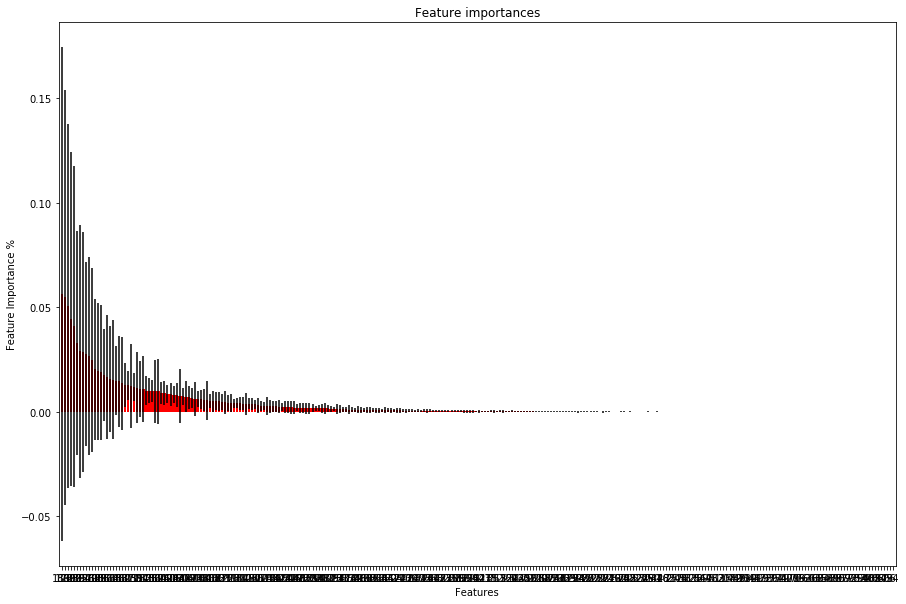

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
foodrating = pd.read_csv("food_rating_full.csv",na_values='?')
#foodrating=foodrating.replace({'ckd':1,'notckd':0})
foodrating.head()
foodrating = foodrating.dropna()


X = foodrating.iloc[:,0:-1].values
#target
y = foodrating.iloc[:,-1].values
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, foodrating.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
#plt.figure()
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.ylabel("Feature Importance %")
plt.xlabel("Features")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [3]:
print("Loading Food Rating Data...")
foodrating = pd.read_csv("food_rating_nothing.csv",na_values='?')
#foodrating=foodrating.replace({'ckd':1,'notckd':0})
foodrating.head()




Loading Food Rating Data...


,Rcuisine=Fast_Food,Rcuisine=Italian,Rcuisine=Mexican,Rcuisine=Cafeteria,Rcuisine=Burgers,Rcuisine=Chinese,Rcuisine=Seafood,Rcuisine=Contemporary,Rcuisine=Bar,Rcuisine=Bar_Pub_Brewery,...,Cdrink_level=abstemious,'Cdrink_level=casual drinker',Cdress_preference=elegant,Cdress_preference=informal,'Cdress_preference=no preference',Cdress_preference=formal,Cambience=friends,Cweight,Cheight,rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0.0,0.0,0.0,0.0,65,1.71,2
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0.0,0.0,0.0,0.0,65,1.71,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0.0,0.0,0.0,0.0,65,1.71,2
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0.0,1.0,0.0,0.0,0.0,76,1.81,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0.0,1.0,0.0,0.0,0.0,76,1.81,1


In [7]:
foodrating = foodrating.dropna()


In [8]:
X = foodrating.iloc[:,0:-1].values
#target
y = foodrating.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
linear = SVC(kernel='linear',decision_function_shape ='ovo').fit(X_train,y_train)
predictions= linear.predict(X_test)
fm = f1_score(y_test,predictions,average='weighted')
print("Linear SVM f-measure: ",fm)

Linear SVM f-measure:  0.8688786787962514


In [10]:
rbf = SVC(kernel='rbf',gamma='auto',decision_function_shape ='ovo').fit(X_train,y_train)
predictions= rbf.predict(X_test)
fm = f1_score(y_test,predictions,average='weighted')
print("RBF SVM f-measure: ",fm)

RBF SVM f-measure:  0.8554464874977977


In [11]:
rbf = SVC(kernel='poly',gamma='auto',decision_function_shape ='ovo').fit(X_train,y_train)
predictions= rbf.predict(X_test)
fm = f1_score(y_test,predictions,average='weighted')
print("Poly SVM f-measure: ",fm)

Poly SVM f-measure:  0.9112359357126455


In [ ]:
forest = RandomForestClassifier().fit(X_train,y_train)
predictions= forest.predict(X_test)
fm = precision_score(y_test,predictions,average='weighted')
print("Random Forest Classifier f-measure: ",fm)

In [ ]:
bayes = MultinomialNB().fit(X_train,y_train)
predictions= bayes.predict(X_test)
fm = precision_score(y_test,predictions,average='weighted')
print("Multi Naive Bayes Classifier f-measure: ",fm)

In [10]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring = 'f1_macro', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Loading Food Rating Data...


c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM: 0.549482 (0.078736)
RF: 0.592319 (0.094454)


c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NB: 0.561224 (0.125921)


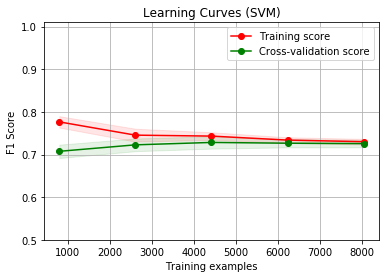

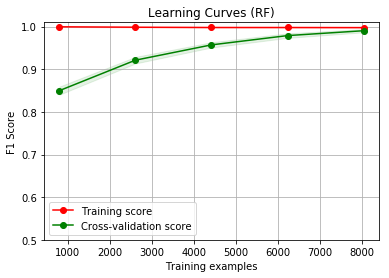

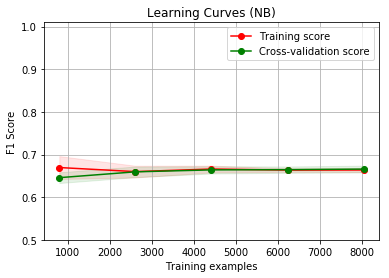

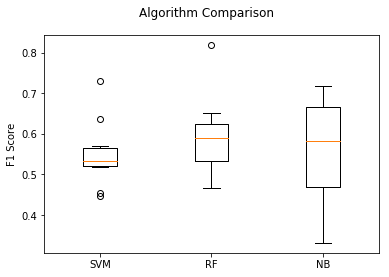

In [12]:
print("Loading Food Rating Data...")
seed = 20
# prepare models
models = []
models.append(('SVM', SVC(kernel = 'linear',decision_function_shape ='ovo')))
models.append(('RF', RandomForestClassifier(n_estimators=250)))
models.append(('NB', MultinomialNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1_macro'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    title = "Learning Curves (%s)" %name
    plot_learning_curve(model, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("F1 Score")
ax.set_xticklabels(names)
plt.show()

Loading Food Rating Data...


c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM: 0.623701 (0.091272)
RF: 0.677312 (0.096507)
NB: 0.656376 (0.108167)


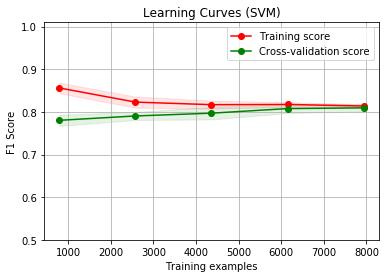

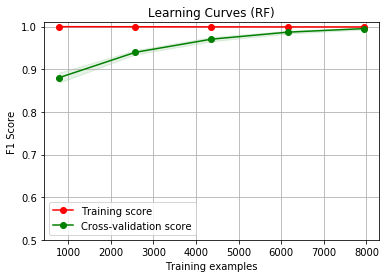

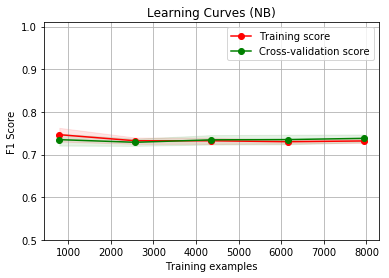

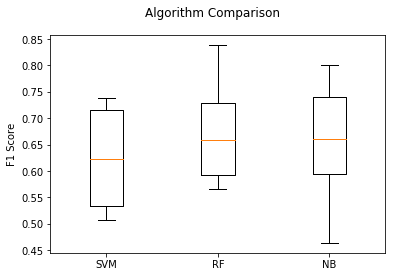

In [13]:
print("Loading Food Rating Data...")
foodrating = pd.read_csv("food_rating_only_more.csv",na_values='?')
#foodrating=foodrating.replace({'ckd':1,'notckd':0})
foodrating.head()
foodrating = foodrating.dropna()


X = foodrating.iloc[:,0:-1].values
#target
y = foodrating.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


seed = 20
# prepare models
models = []
models.append(('SVM', SVC(kernel = 'linear',decision_function_shape ='ovo')))
models.append(('RF', RandomForestClassifier(n_estimators=250)))
models.append(('NB', MultinomialNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1_macro'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    title = "Learning Curves (%s)" %name
    plot_learning_curve(model, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("F1 Score")
ax.set_xticklabels(names)
plt.show()

Loading Food Rating Data...
SVM: 0.540402 (0.111861)
RF: 0.632346 (0.107662)


c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NB: 0.562260 (0.112064)


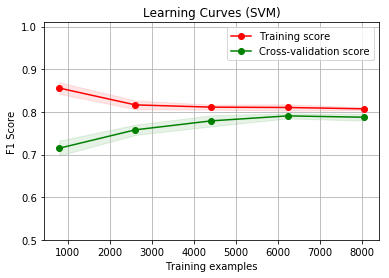

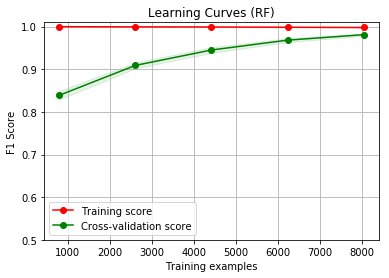

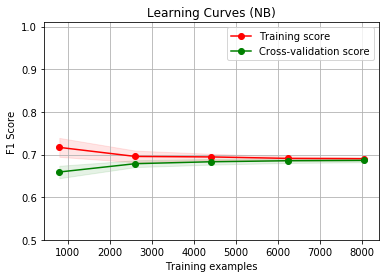

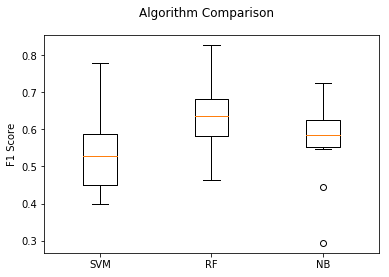

In [15]:
print("Loading Food Rating Data...")
foodrating = pd.read_csv("food_rating_only_less.csv",na_values='?')
#foodrating=foodrating.replace({'ckd':1,'notckd':0})
foodrating.head()
foodrating = foodrating.dropna()


X = foodrating.iloc[:,0:-1].values
#target
y = foodrating.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


seed = 20
# prepare models
models = []
models.append(('SVM', SVC(kernel = 'linear',decision_function_shape ='ovo')))
models.append(('RF', RandomForestClassifier(n_estimators=250)))
models.append(('NB', MultinomialNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1_macro'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    title = "Learning Curves (%s)" %name
    plot_learning_curve(model, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("F1 Score")
ax.set_xticklabels(names)
plt.show()

Loading Food Rating Data...
SVM: 0.624878 (0.111231)
RF: 0.704369 (0.085117)


c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NB: 0.675336 (0.093855)


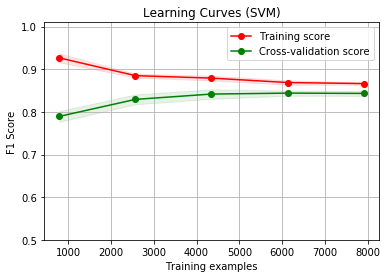

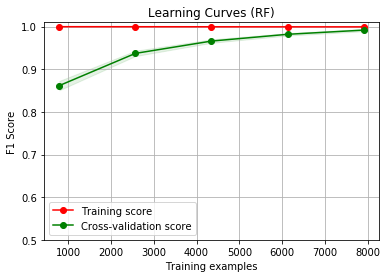

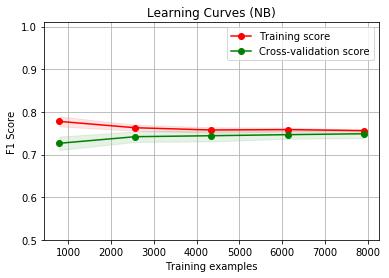

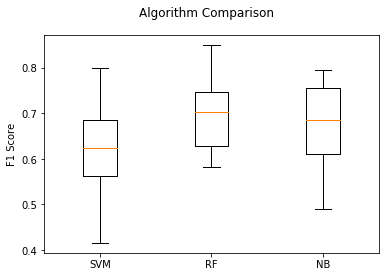

In [16]:
print("Loading Food Rating Data...")
foodrating = pd.read_csv("food_rating_full.csv",na_values='?')
foodrating.head()
foodrating = foodrating.dropna()


X = foodrating.iloc[:,0:-1].values
#target
y = foodrating.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


seed = 20
# prepare models
models = []
models.append(('SVM', SVC(kernel = 'linear',decision_function_shape ='ovo')))
models.append(('RF', RandomForestClassifier(n_estimators=250)))
models.append(('NB', MultinomialNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1_macro'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    title = "Learning Curves (%s)" %name
    plot_learning_curve(model, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("F1 Score")
ax.set_xticklabels(names)
plt.show()